In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy

In [3]:
#Import Federal Funds Rate Data
filepath = '/Users/jasonting/Downloads/DFF.csv'
ff_df = pd.read_csv(filepath)
ff_df.head()

,DATE,DFF
0,2014-07-12,0.09
1,2014-07-13,0.09
2,2014-07-14,0.09
3,2014-07-15,0.09
4,2014-07-16,0.09


In [7]:
ff_df['DFF_Chng']= ff_df['DFF'].diff().dropna() #Take the first difference (Required to estimate parameters using OLS)

x_vector = ff_df['DFF'].shift().dropna(); y_vector = ff_df['DFF_Chng'].dropna() #Define X & Y Values for OLS
x_vector = sm.add_constant(x_vector) #Add constant (Column Vector of 1's)

model = sm.OLS(y_vector, x_vector).fit()
parameters = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DFF_Chng   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6630
Date:                Sun, 21 Jul 2024   Prob (F-statistic):              0.416
Time:                        16:54:54   Log-Likelihood:                 6711.5
No. Observations:                3653   AIC:                        -1.342e+04
Df Residuals:                    3651   BIC:                        -1.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.147      0.251      -0.001       0.003
DFF            0.0003      0.000      0.814      0.416      -0.000       0.001
==============================================================================
Omnibus:                     4736.000   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9580127.734
Skew:                           6.207   Prob(JB):                         0.00
Kurtosis:                     253.573   Cond. No.                         3.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
dt = 1/252
parameters[1]


0.00029502050024216215

In [9]:
import pandas as pd
import pandas_datareader.data as web

# Historical 3 Month Daily T-Bill Rate from 
start_date = '2000-01-01'
end_date = '2023-01-01'
data = web.DataReader('DTB3', 'fred', start_date, end_date)

# Calculate daily changes
data['DTB3_change'] = data['DTB3'].diff()
data.dropna(inplace=True)  # Drop the first row with NaN value

data.head()

rate_zero = data['DTB3'].iloc[-1]/100


In [10]:
x_vector = data['DTB3'].shift().dropna(); y_vector = data['DTB3_change'] #Define X & Y Values for OLS
x_vector = sm.add_constant(x_vector) #Add constant (Column Vector of 1's)
y_vector = y_vector[1:]

model = sm.OLS(y_vector, x_vector).fit()
parameters = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DTB3_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.761
Date:                Sun, 21 Jul 2024   Prob (F-statistic):             0.0292
Time:                        16:54:58   Log-Likelihood:                 9464.0
No. Observations:                5505   AIC:                        -1.892e+04
Df Residuals:                    5503   BIC:                        -1.891e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.971e-05      0.001      0.103      0.918      -0.001       0.002
DTB3          -0.0007      0.000     -2.182      0.029      -0.001   -7.44e-05
==============================================================================
Omnibus:                     2882.860   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008870.605
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                      69.273   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Calculate Parameters
delta_t = 1/252
alpha = -parameters[1]/delta_t # Rate of Mean Reversion
beta = parameters[0]/(alpha * delta_t) # Long Term Mean
vol = (np.std(model.resid))/np.sqrt(delta_t) # Volatility

print(f'Rate of Mean Reversion: {alpha}')
print(f'Long Term Mean Rate: {beta}')
print(f'Sigma: {vol}')

Rate of Mean Reversion: 0.1847634304437664
Long Term Mean Rate: 0.10871121469543825
Sigma: 0.6883960748803127


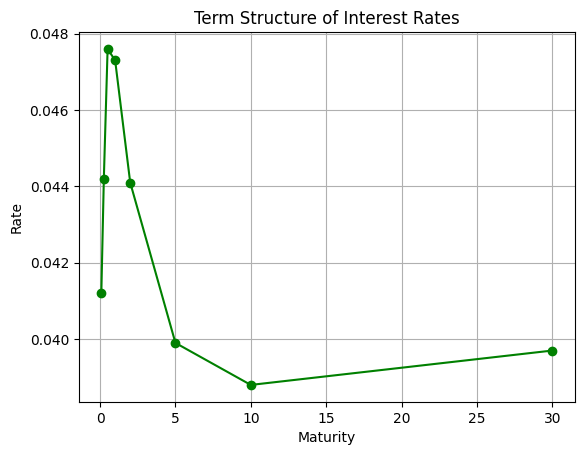

In [12]:
#Term Structure 
yield_data = web.DataReader(['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS30'],
                            'fred', start_date, end_date)
rates = yield_data.iloc[-1] #Take the latest term structure 
initial_rates = rates.values/100 

#Plot Term Structure
maturities = np.array([1/12,3/12,6/12,1,2,5,10,30])
yearly_maturities = np.arange(0,35,5) 
xlabels = [str(i) for i in yearly_maturities]
plt.plot(maturities, initial_rates, color='green',marker='o');plt.title('Term Structure of Interest Rates');plt.xticks(yearly_maturities,xlabels);plt.xlabel('Maturity');plt.ylabel('Rate');plt.grid(True);plt.show()


In [31]:
maturities

array([ 0.08333333,  0.25      ,  0.5       ,  1.        ,  2.        ,
        5.        , 10.        , 30.        ])

Alpha: 0.021212037152825006
Mu: 0.2318541922932157
Sigma: 0.4186356553301164


/var/folders/_8/50mbqfv150q2ctjn78cvlxbr0000gn/T/ipykernel_38330/748546017.py:17: RuntimeWarning: divide by zero encountered in log
  yields = -np.log(prices)/maturities


2521

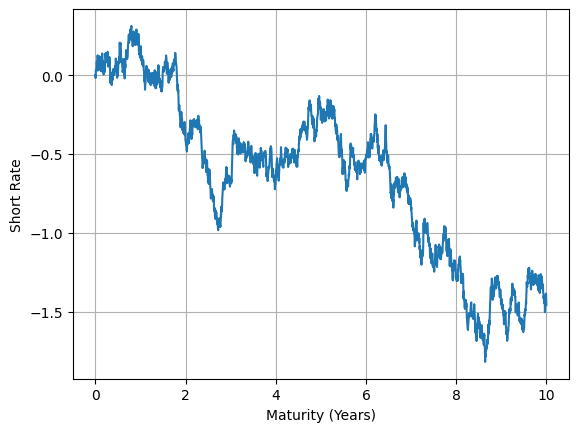

In [75]:
from scipy.optimize import minimize
guess_parameters = [0.1,.2,.3]

def hull_white_calibrate(parameters, maturities):
    alpha, mu, sigma = parameters
    prices = []
    for t in maturities: 
        Bt = (1 - np.exp(-alpha * t)) / alpha
        At = np.exp((Bt - t) * mu - (sigma**2 / (4 * alpha)) * (1 - np.exp(-2 * alpha * t)) * Bt**2)
        Pt = (At * np.exp(-Bt * mu))
        prices.append(Pt)
        
    return np.array(prices)

def obj_func(parameters):
    prices = hull_white_calibrate(parameters,maturities)
    yields = -np.log(prices)/maturities
    return np.sum(yields - rates.values)**2 

result = minimize(obj_func, guess_parameters, method='Nelder-Mead')
calibrated_params = result.x

print(f'Alpha: {calibrated_params[0]}')
print(f'Mu: {calibrated_params[1]}')
print(f'Sigma: {calibrated_params[2]}')

def simulate_hull_white(params, t_max, dt):
    alpha, mu, sigma = params
    n_steps = int(t_max / dt)
    r = np.zeros(n_steps + 1)
    for i in range(n_steps):
        dr = alpha * (mu - r[i]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        r[i + 1] = r[i] + dr
    return r

instantaneous_short_rate = simulate_hull_white(calibrated_params,10,1/252)
t_array = np.arange(0,(10+.5/252),1/252)

plt.plot(t_array,instantaneous_short_rate);plt.grid(True);plt.xlabel('Maturity (Years)');plt.ylabel('Short Rate')

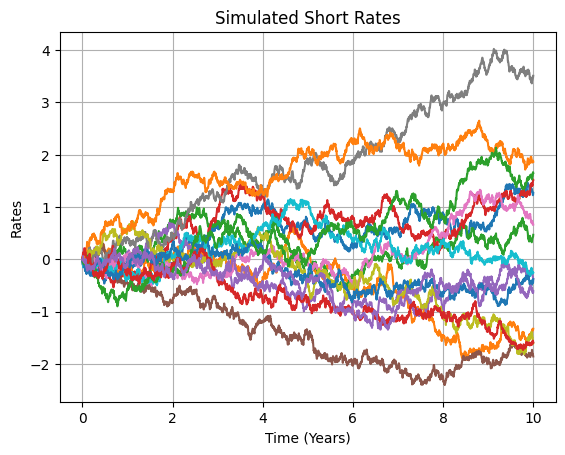

/var/folders/_8/50mbqfv150q2ctjn78cvlxbr0000gn/T/ipykernel_38330/859975966.py:20: RuntimeWarning: invalid value encountered in divide
  return maturities, (-np.log(discount_factor)/maturities)


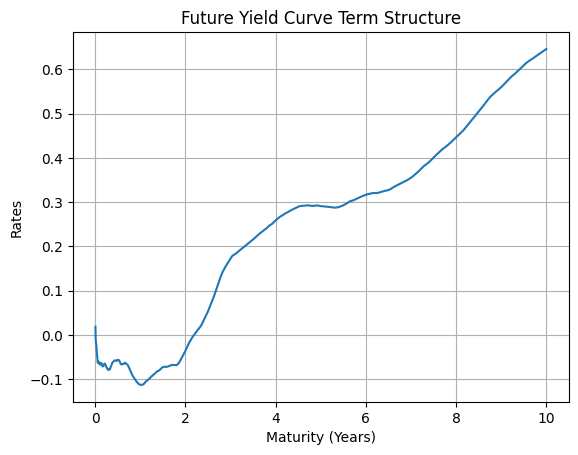

In [111]:
def generate_paths(params, num_paths,tmax,dt):
    n_steps = int(tmax / dt)
    short_rates = np.empty((0, n_steps + 1)) 
    
    for _ in range(num_paths):
        path = simulate_hull_white(params,tmax,dt)
        short_rates = np.vstack((short_rates, path))
        
    return short_rates

def plot_paths(paths):
    for _, path in enumerate(paths):
        plt.plot(t_array,path,label=_);plt.grid(True);plt.xlabel('Time (Years)');plt.ylabel('Rates');plt.title('Simulated Short Rates')
    plt.show()

def discount_factors(rates,dt):
    return np.exp(np.cumsum(rates) * dt)

def zero_rates(discount_factor, maturities):
    return maturities, (-np.log(discount_factor)/maturities)



short_rates = generate_paths(calibrated_params,15,10,1/252)
plot_paths(short_rates)
df_array = discount_factors(instantaneous_short_rate, 1/252)
maturities, zero_coupon_rate = zero_rates(df_array,t_array)

plt.plot(maturities,zero_coupon_rate);plt.xlabel('Maturity (Years)');plt.ylabel('Rates');plt.grid(True);plt.title('Future Yield Curve Term Structure');plt.show()
